In [8]:
from PIL import Image, ImageEnhance, ImageShow

In [147]:
background=Image.open('Downloads\\back.jfif')

In [155]:
overlay_image=Image.open('Downloads\\over.png')

In [149]:
s=overlay.size
overlay=overlay.resize((1020,1020))

In [150]:
def ReduceOpacity(im, opacity):
    """
    Returns an image with reduced opacity.
    Taken from http://aspn.activestate.com/ASPN/Cookbook/Python/Recipe/362879
    """
    assert opacity >= 0 and opacity <= 1
    if im.mode != 'RGBA':
        im = im.convert('RGBA')
    else:
        im = im.copy()
    alpha = im.split()[3]
    alpha = ImageEnhance.Brightness(alpha).enhance(opacity)
    im.putalpha(alpha)
    return im

In [151]:
overlay1=ReduceOpacity(overlay,0.1)

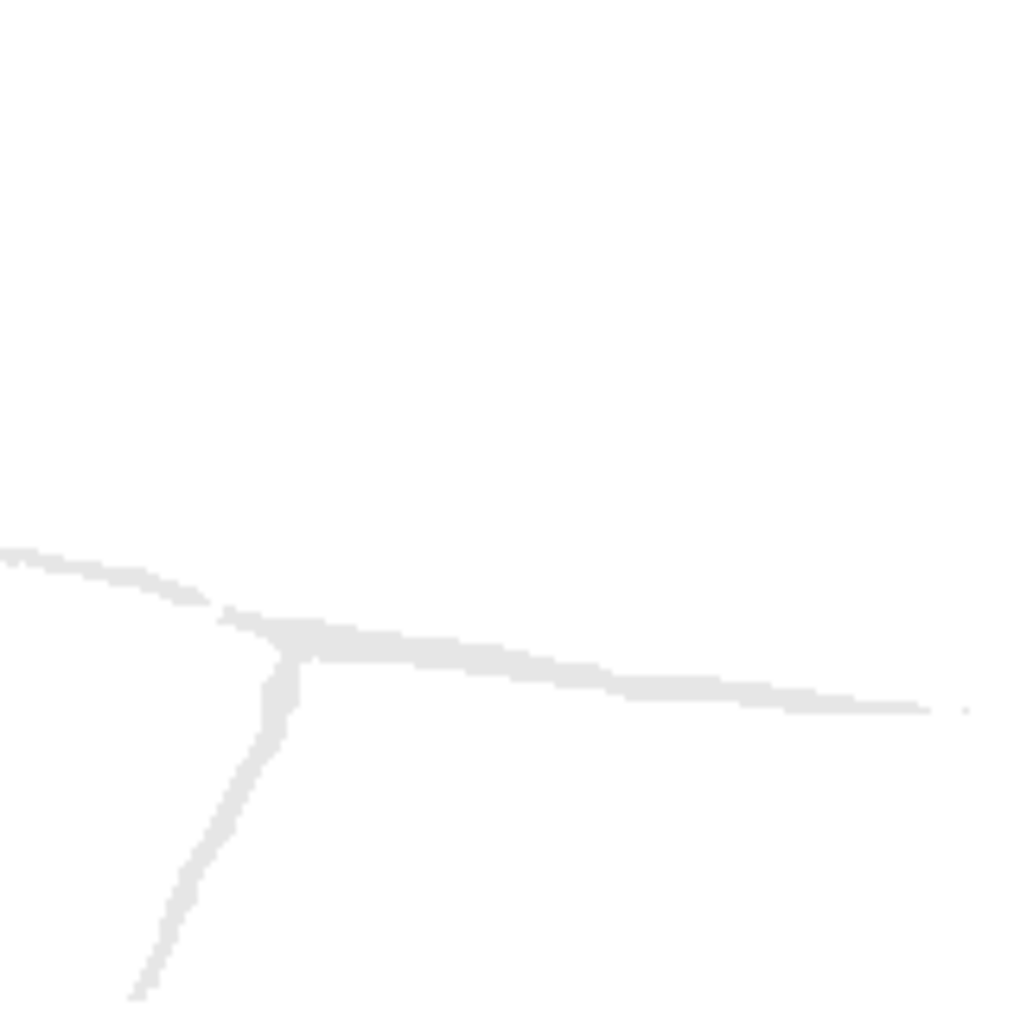

In [152]:
overlay1

In [153]:
background=Image.open('Downloads\\back.jfif')
background.paste(overlay)

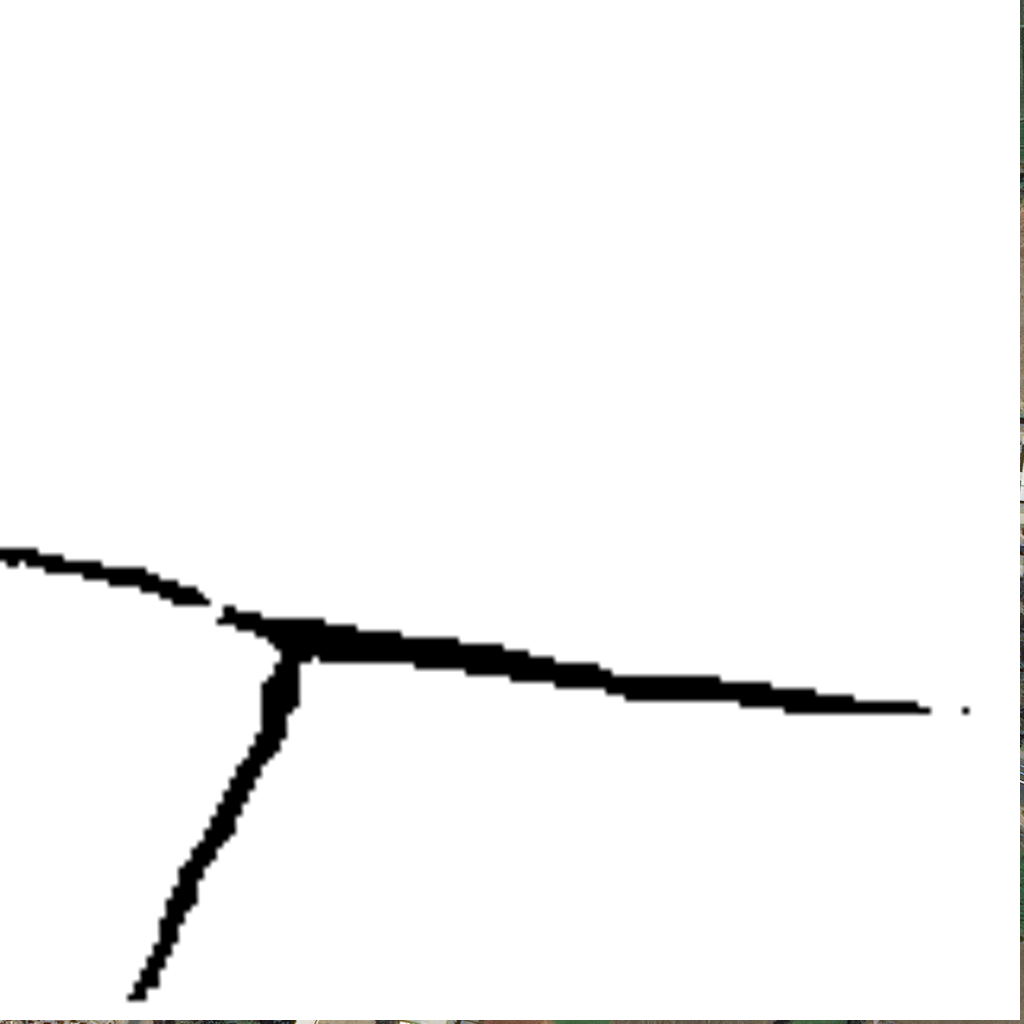

In [154]:
background

In [18]:
from matplotlib import pyplot as plt

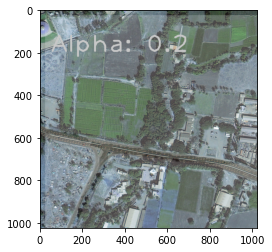

In [47]:
import cv2
import numpy as np

# Loading our images
# Background/Input image
background=cv2.imread('Downloads\\back.jfif')

# Overlay image
overlay_image = cv2.imread('Downloads\\over.png')

# Resize the overlay image to match the bg image dimensions
overlay_image = cv2.resize(overlay_image, (1000, 1000))
h, w = overlay_image.shape[:2]

# Create a new np array
shapes = np.zeros_like(background, np.uint8)

# Put the overlay at the bottom-right corner
shapes[background.shape[0]-h:, background.shape[1]-w:] = overlay_image

# Change this into bool to use it as mask
mask = shapes.astype(bool)

# We'll create a loop to change the alpha
# value i.e transparency of the overlay
for alpha in np.arange(0, 0.3, 0.1):

	# Create a copy of the image to work with
	bg_img = background.copy()
	# Create the overlay
	bg_img[mask] = cv2.addWeighted(bg_img, 1 - alpha, shapes,
								alpha, 0)[mask]

	# print the alpha value on the image
	cv2.putText(bg_img, f'Alpha: {round(alpha,1)}', (50, 200),
				cv2.FONT_HERSHEY_PLAIN, 8, (200, 200, 200), 7)

	# resize the image before displaying
	bg_img = cv2.resize(bg_img, (1024, 1024))
	a=np.asarray(bg_img)
	plt.imshow( bg_img)